# Модель межотраслевого баланса В.Леонтьева

## Вариант 13. Э-2209 Лёвкина Екатерина

In [1]:
import numpy as np

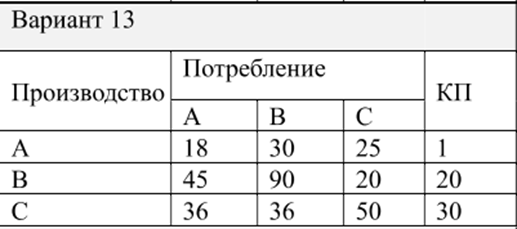

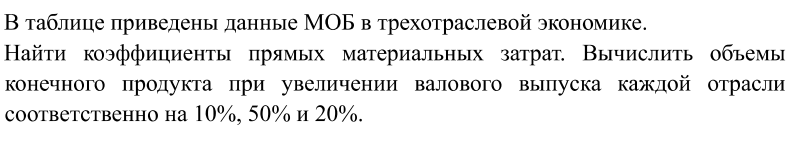

In [2]:
# Запишем в переменные данные задачи
x_matrix = np.array([[18,30,25],
                    [45,90,20],
                    [36,36,50]])
y_vector = np.array([1,20,30]).reshape(-1,1)

# Также создадим единичную матрицу с размерностью 3:3
e_matrix = np.eye(3)

# И вектор валового выпуска (он нужен для формирования матрицы прямых материальных затрат)
gross_output = np.sum(x_matrix,axis=1).reshape(-1,1) + y_vector

In [5]:
r = x_matrix.shape[1] # Создадим переменную r - количество столбцов в матрице X - для фоомирования матрицы A
a_matrix = np.zeros((3, 3)) # Создадим нулевую матрицу 3:3, чтобы  дальше заполнить ее 

for i in range(r):
    a_matrix[:,i] = x_matrix[:,i] / gross_output[i]

a_matrix    

array([[0.24324324, 0.17142857, 0.16447368],
       [0.60810811, 0.51428571, 0.13157895],
       [0.48648649, 0.20571429, 0.32894737]])

In [11]:
# Отнимем матрицу прямых затрат от единичной матрицы и возьмем обратную ей матрицу
inv_matrix = np.linalg.inv(e_matrix - a_matrix)

x_vector = inv_matrix.dot(y_vector)
x_vector

#### Теперь решим задачу для дополнительного условия:
    Вычислить объемы конечного продукта при увеличении валового выпуска на 10%, 50% и 20% соответственно 

In [24]:
coeff = np.array([1.1, 1.5, 1.2]).reshape(-1,1)
new_gross_output = gross_output * coeff
new_gross_output

array([[ 81.4],
       [262.5],
       [182.4]])

In [25]:
new_a_matrix = np.zeros((3, 3)) # Создадим нулевую матрицу 3:3, чтобы  дальше заполнить ее 

for i in range(r):
    new_a_matrix[:,i] = x_matrix[:,i] / new_gross_output[i]

new_a_matrix    

array([[0.22113022, 0.11428571, 0.1370614 ],
       [0.55282555, 0.34285714, 0.10964912],
       [0.44226044, 0.13714286, 0.27412281]])

In [27]:
# Отнимем матрицу прямых затрат от единичной матрицы и возьмем обратную ей матрицу
new_inv_matrix = np.linalg.inv(e_matrix - new_a_matrix)

new_x_vector = new_inv_matrix.dot(y_vector)
new_x_vector

array([[21.59336971],
       [59.56960594],
       [65.74037545]])